In [2]:
from sklearn.preprocessing import LabelBinarizer


Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_10[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d_8[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']   

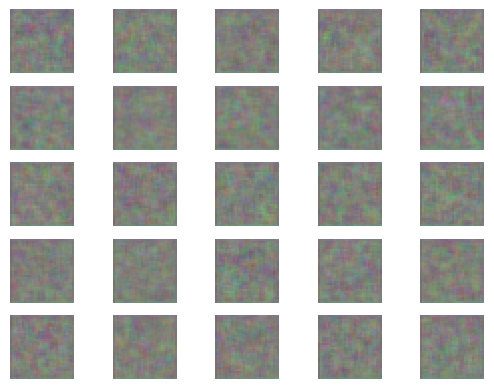

1/1 [==============================] - 0s 24ms/step
1 [Discriminator loss: 1.758335, acc_real: 59.38%, acc_fake: 21.88%] [Generator loss: 0.656016]
1/1 [==============================] - 0s 25ms/step
2 [Discriminator loss: 1.402194, acc_real: 81.25%, acc_fake: 40.62%] [Generator loss: 0.654093]
1/1 [==============================] - 0s 32ms/step
3 [Discriminator loss: 1.205799, acc_real: 62.50%, acc_fake: 78.12%] [Generator loss: 0.740581]
1/1 [==============================] - 0s 29ms/step
4 [Discriminator loss: 1.040096, acc_real: 53.12%, acc_fake: 81.25%] [Generator loss: 0.609801]
1/1 [==============================] - 0s 20ms/step
5 [Discriminator loss: 1.010632, acc_real: 71.88%, acc_fake: 84.38%] [Generator loss: 0.666136]
1/1 [==============================] - 0s 24ms/step
6 [Discriminator loss: 0.757806, acc_real: 71.88%, acc_fake: 96.88%] [Generator loss: 0.525684]
1/1 [==============================] - 0s 22ms/step
7 [Discriminator loss: 0.696399, acc_real: 71.88%, acc_fake:

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/35
781/781 [==============================] - 59s 60ms/step - loss: 3.7325 - accuracy: 0.1372 - val_loss: 3.5197 - val_accuracy: 0.1801
Epoch 2/35
781/781 [==============================] - 43s 55ms/step - loss: 2.9637 - accuracy: 0.2639 - val_loss: 2.8278 - val_accuracy: 0.3207
Epoch 3/35
781/781 [==============================] - 44s 56ms/step - loss: 2.4973 - accuracy: 0.3522 - val_loss: 2.6663 - val_accuracy: 0.3522
Epoch 4/35
781/781 [==============================] - 44s 57ms/step - loss: 2.1620 - accuracy: 0.4249 - val_loss: 2.3033 - val_accuracy: 0.3960
Epoch 5/35
781/781 [==============================] - 45s 58ms/step - loss: 1.9070 - accuracy: 0.4803 - val_loss: 2.2680 - val_accuracy: 0.4178
Epoch 6/35
781/781 [==============================] - 44s 56ms/step - loss: 1.6728 - accuracy: 0.5338 - val_loss: 2.2936 - val_accuracy: 0.4343
Epoch 7/35
781/781 [==============================] - 45s 57ms/step - loss: 1.4527 - accuracy: 0.5855 - val_loss: 2.4833 - val_accuracy:

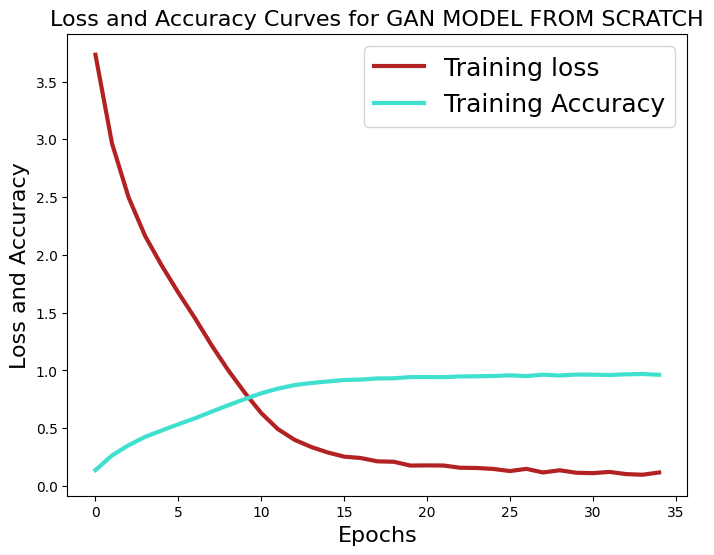

In [5]:
#importing the libraries
import numpy as np
import sklearn.metrics as metrics
from keras.applications import densenet
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras import initializers
# create the model from keras and set weights=None for training from scratch
model = densenet.DenseNet121(weights=None, input_shape=(32,32,3), pooling=None, classes=100)
# printing the model summary
model.summary()
# Splitting training and testing set
(cifarx_train, cifary_train), (cifarx_test, cifary_test) = cifar100.load_data()
# Converting to float
cifarx_train = cifarx_train.astype('float32')
cifarx_test = cifarx_test.astype('float32')
# converting data into normalize form
cifarx_train = densenet.preprocess_input(cifarx_train)
cifarx_test = densenet.preprocess_input(cifarx_test)
# Use LabelBinarizer to one-hot encode the target variable
label_binarizer = LabelBinarizer()
cifarY_train = label_binarizer.fit_transform(cifary_train)
cifarY_test = label_binarizer.transform(cifary_test)
# Defining the generator model for GAN
def Gan_build_generator():
    model = Sequential()
    model.add(Dense(128 * 8 * 8, activation="relu", input_dim=100))
    model.add(Reshape((8, 8, 128)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Conv2D(3, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))
    noise = Input(shape=(100,))
    img = model(noise)
    return Model(noise, img)
# Defining the discriminator model for GAN
def Gan_build_discriminator():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(32, 32, 3), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    img = Input(shape=(32, 32, 3))
    validity = model(img)
    return Model(img, validity)
# Compiling the discriminator model
discriminator = Gan_build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])
# Compiling the generator model
generator = Gan_build_generator()
# The generator takes noise as input and generates images
z = Input(shape=(100,))
img = generator(z)
# Training the generator
discriminator.trainable = False
# Discriminator taking generated images as input and checking validity
valid = discriminator(img)
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
# declaring hyperparameters
epochs =20
batch_size = 32
save_interval = 1000
# Training the GAN model
for epoch in range(epochs):
    # Training discriminator with real images
    idx = np.random.randint(0, cifarx_train.shape[0], batch_size)
    real_imgs = cifarx_train[idx]
    real_labels = np.ones((batch_size, 1))
    discriminator_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
# Training discriminator with fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))
    discriminator_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
# Training generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    generator_loss = combined.train_on_batch(noise, valid_y)
# describing the progress
    print ("%d [Discriminator loss: %f, acc_real: %.2f%%, acc_fake: %.2f%%] [Generator loss: %f]" % (epoch, discriminator_loss_real[0]+discriminator_loss_fake[0], 100*discriminator_loss_real[1], 100*discriminator_loss_fake[1], generator_loss))
    if epoch % save_interval == 0:
        # show images from the generator
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        # Plot the generated images
        fig, axs = plt.subplots(5, 5)
        counter = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[counter, :,:,:])
                axs[i,j].axis('off')
                counter += 1
        plt.show()
# Using Adam and set learning rate 0.001
optimizer = Adam(lr=0.001)  
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
history = model.fit(cifarx_train, cifarY_train, batch_size=64, shuffle=True, 
                    steps_per_epoch=len(cifarx_train)/64, epochs=35, validation_data=(cifarx_test, cifarY_test))
# Evaluate the model
scores = model.evaluate(cifarx_test, cifarY_test, verbose=0)
print("The test accuracy is: %.2f%%" % (scores[1]*100))

# Define plotchart function
def plotchart(history, value):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'], 'firebrick', linewidth=3.0)
    plt.plot(history.history['accuracy'], 'turquoise', linewidth=3.0)
    plt.legend(['Training loss', 'Training Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss and Accuracy', fontsize=16)
    plt.title('Loss and Accuracy Curves for {}'.format(value), fontsize=16)
    plt.show()

# Plot the training history
plotchart(history, 'GAN MODEL FROM SCRATCH')


1/1 [==============================] - 0s 67ms/step


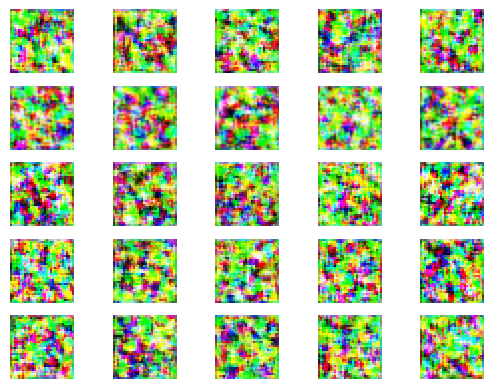

In [20]:
# show images from the generator

genrated_images = generator.predict(noise)
# Rescale pixel values from [-1, 1] to [0, 1]
genrated_images = 0.5 * genrated_images + 0.5
# Plot the generated images 
fig, axs = plt.subplots(5, 5)
cnt = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(genrated_images[cnt,:,:,:])
        axs[i,j].axis('off')
        cnt += 1